In [10]:
!pip install folium

     |████████████████████████████████| 94 kB 5.0 MB/s 


In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
import folium

In [13]:
hospital = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Hospitals%20count%20in%20India%20-%20Statewise/Hospitals%20count%20in%20India%20-%20Statewise.csv")

In [14]:
hospital.head()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26


In [15]:

hospital.rename(columns={"States/UTs":"States",
                   "Number of hospitals in public sector": "Public",
                   "Number of hospitals in private sector": "Private",
                   "Total number of hospitals (public+private)":"Total"
                  }, inplace=True)
hospital['Total'] = pd.to_numeric(hospital['Total'], errors='coerce')
hospital['Public'] = pd.to_numeric(hospital['Public'], errors='coerce')
hospital['Private'] = pd.to_numeric(hospital['Private'], errors='coerce')

In [16]:
hospital.dropna(inplace=True)

In [17]:
hospital.head()

,States,Public,Private,Total
0,Lakshadweep,9.0,4.0,13.0
1,Chandigarh,9.0,4.0,13.0
2,Dadra & N Haveli,12.0,6.0,18.0
3,Puducherry,14.0,6.0,20.0
4,Daman & Diu,5.0,21.0,26.0


In [19]:
print('The dataset has {} rows and {} columns.'.format(len(hospital), len(hospital.columns)))

The dataset has 19 rows and 4 columns.


In [20]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   States   19 non-null     object 
 1   Public   19 non-null     float64
 2   Private  19 non-null     float64
 3   Total    19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


In [21]:
hospital.describe()

,Public,Private,Total
count,19.000000,19.000000,19.000000
mean,106.894737,171.368421,191.947368
std,119.019557,439.347270,284.776028
min,5.000000,4.000000,13.000000
25%,22.000000,7.000000,31.000000
50%,43.000000,14.000000,65.000000
75%,156.500000,25.500000,180.500000
max,465.000000,1822.000000,971.000000


In [22]:
fig = px.bar(hospital, x='States', y='Total', title="Total number of hospital in all the states/UTs")
fig.show()

Unsupported

In [23]:
fig = px.bar(hospital, x='States', y='Private', title="Private sector hospital in the states/UTs")
fig.show()

Unsupported

In [24]:
fig = px.bar(hospital, x='States', y='Public', title="Public sector hospital in the states/UTs")
fig.show()

Unsupported

In [25]:
print(hospital.groupby(["States"])[['Public', 'Private']].sum())

                         Public  Private
States                                  
Andaman Nicobar Islands    30.0      6.0
Andhra Pradesh            258.0    670.0
Arunachal Pradesh         218.0     20.0
Chandigarh                  9.0      4.0
Chhattisgarh              214.0   1822.0
Dadra & N Haveli           12.0      6.0
Daman & Diu                 5.0     21.0
Delhi                     109.0     67.0
Goa                        43.0     22.0
Jammu & Kashmir           143.0     14.0
Lakshadweep                 9.0      4.0
Madhya Pradesh            465.0    506.0
Manipur                    30.0      8.0
Meghalaya                 157.0     28.0
Mizoram                    90.0     23.0
Nagaland                   36.0     13.0
Puducherry                 14.0      6.0
Sikkim                     33.0      8.0
Tripura                   156.0      8.0


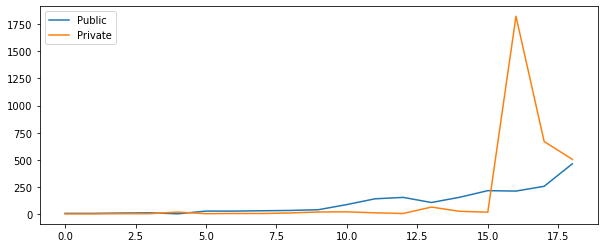

In [26]:
hospital.plot.line(y=['Public','Private'],figsize=(10,4))